# Лабораторная работа №1
## Разведочный анализ данных

## Задание:
- Выбрать набор данных (датасет). Вы можете найти список свободно распространяемых датасетов здесь.
- Для первой лабораторной работы рекомендуется использовать датасет без пропусков в данных, например из Scikit-learn.
- Пример преобразования датасетов Scikit-learn в Pandas Dataframe можно посмотреть здесь.
Для лабораторных работ не рекомендуется выбирать датасеты большого размера.

- Создать ноутбук, который содержит следующие разделы:
1. Текстовое описание выбранного Вами набора данных.
2. Основные характеристики датасета.
3. Визуальное исследование датасета.
4. Информация о корреляции признаков.
- Сформировать отчет и разместить его в своем репозитории на github.

## 1) Текстовое описание набора данных

В качестве набора данных будем использовать датасет в котором содержится информация о ценах пиццы в различных популярных пиццериях.
Файл pizza_data.csv содержит следующие колонки:
- Company - Название компании
- Pizza Name - Название пиццы
- Type - Тип пиццы
- Size - Размер пиццы в дюймах
- Price - Цена пиццы в долларах

### Импорт библиотек

In [218]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

### Загрузка данных

In [219]:
df = pd.read_csv("C:\\Users\\adolf\\Downloads\\pizza_data.csv")

## 2) Основные характеристики датасета

In [220]:
#Отобразим первые 5 строк датасета:
df.head()

,Company,Pizza Name,Type,Size,Price
0,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Small (10"")",$5.99
1,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Medium (12"")",$7.99
2,Domino's Pizza,Hand Tossed,Cheeses Pizza,"Large (14"")",$9.99
3,Domino's Pizza,Handmade Pan,Cheeses Pizza,"Medium (12"")",$7.99
4,Domino's Pizza,Crunchy Thin Crust,Cheeses Pizza,"Small (10"")",$5.99


In [221]:
#Определим размер датасета
size = df.shape
print("Всего строк: {}".format(size[0]))
print("Всего столбцов: {}".format(size[1]))

Всего строк: 371
Всего столбцов: 5


In [222]:
#Список колонок с типами данных
df.dtypes

Company       object
Pizza Name    object
Type          object
Size          object
Price         object
dtype: object

Преобразуем столбцы "Price" и "Size" в тип float и int соответственно:

In [223]:
label_encoder = LabelEncoder()
for i in range(df.shape[0]):
    df["Price"][i] = float(df["Price"][i][1:])
    if "Small" in df["Size"][i]:
        df["Size"][i] = 10
    elif "Medium" in df["Size"][i]:
        df["Size"][i] = 12
    elif "Large" in df["Size"][i]:
        df["Size"][i] = 14
    elif "X-Large" in df["Size"][i]:
        df["Size"][i] = 16
    elif "Personal" in df["Size"][i]:
        df["Size"][i] = 7
    elif "Mini" in df["Size"][i]:
        df["Size"][i] = 8
    elif "Jumbo" in df["Size"][i]:
        df["Size"][i] = 18
df["Size"] = df["Size"].astype("int")
df["Price"] = df["Price"].astype("float")
df['Company'] = label_encoder.fit_transform(df['Company'])
df['Pizza Name'] = label_encoder.fit_transform(df['Pizza Name'])
df['Type'] = label_encoder.fit_transform(df['Type'])

In [224]:
#Проверим результат 
df.dtypes

Company         int32
Pizza Name      int32
Type            int32
Size            int32
Price         float64
dtype: object

In [225]:
#Проверка на наличие пустых значений
for col in df.columns:
    temp = df[df[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp))

Company - 0
Pizza Name - 0
Type - 0
Size - 0
Price - 0


In [226]:
#Найдём основные статичтические характеристики набора данных
df.describe()

,Company,Pizza Name,Type,Size,Price
count,371.000000,371.000000,371.000000,371.000000,371.000000
mean,1.506739,120.415094,5.409704,12.506739,16.319326
std,1.186333,72.865780,2.886935,2.290246,5.714662
min,0.000000,0.000000,0.000000,7.000000,4.290000
25%,1.000000,59.000000,2.000000,12.000000,12.490000
50%,1.000000,118.000000,8.000000,12.000000,15.490000
75%,3.000000,187.000000,8.000000,14.000000,19.950000
max,3.000000,246.000000,8.000000,18.000000,29.990000


## 3) Визуальное исследование датасета

### Диаграмма расеяния

<Axes: xlabel='Size', ylabel='Price'>

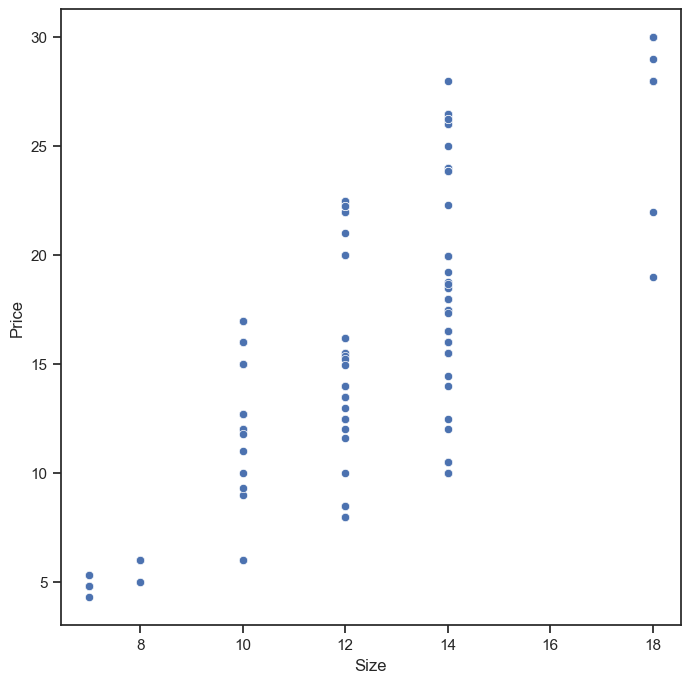

In [227]:
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='Size', y='Price', data=df)

<Axes: xlabel='Size', ylabel='Price'>

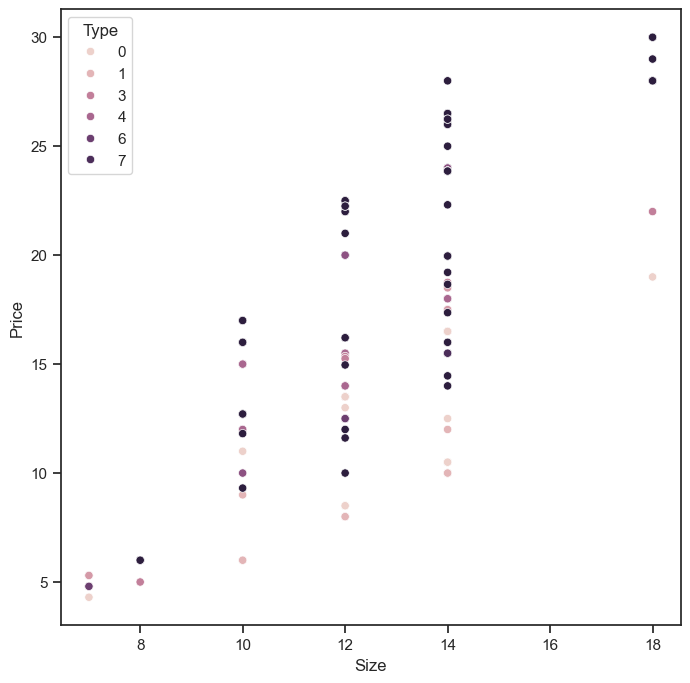

In [228]:
#Зависимость цены и размера от типа пиццы
fig, ax = plt.subplots(figsize=(8,8)) 
sns.scatterplot(ax=ax, x='Size', y='Price', data=df, hue="Type")

### Гистограмма

C:\Users\adolf\AppData\Local\Temp\ipykernel_16952\2776030940.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["Price"])


<Axes: xlabel='Price', ylabel='Density'>

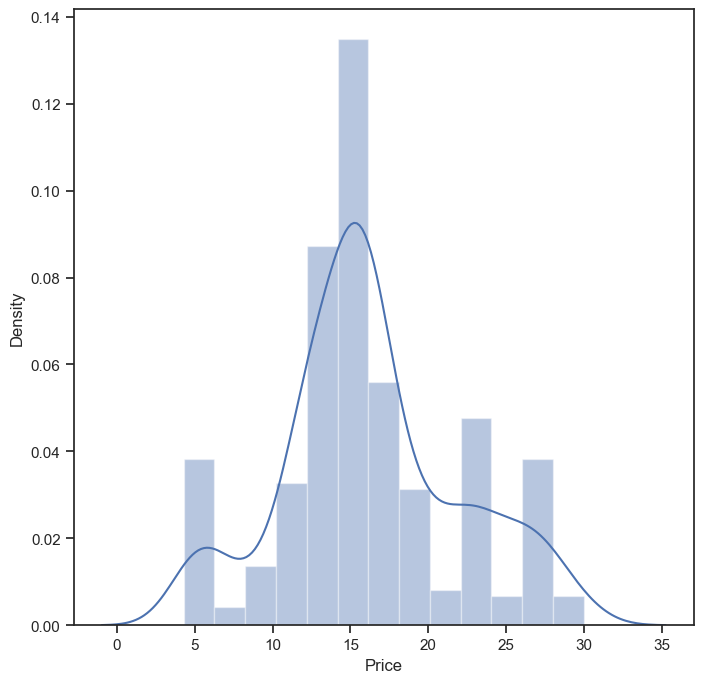

In [229]:
#Оценим распределение цены с помощью гистограммы
fig, ax = plt.subplots(figsize=(8,8)) 
sns.distplot(df["Price"])

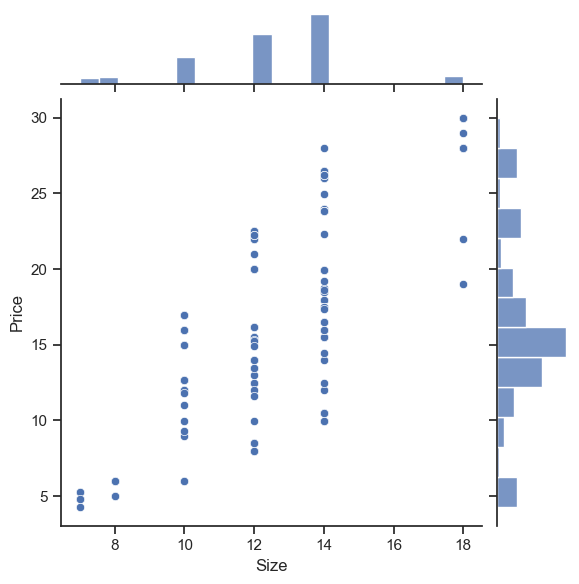

In [230]:
#Комбинация гистограмм и диаграмм рассеивания
sns.jointplot(x='Size', y='Price', data=df)

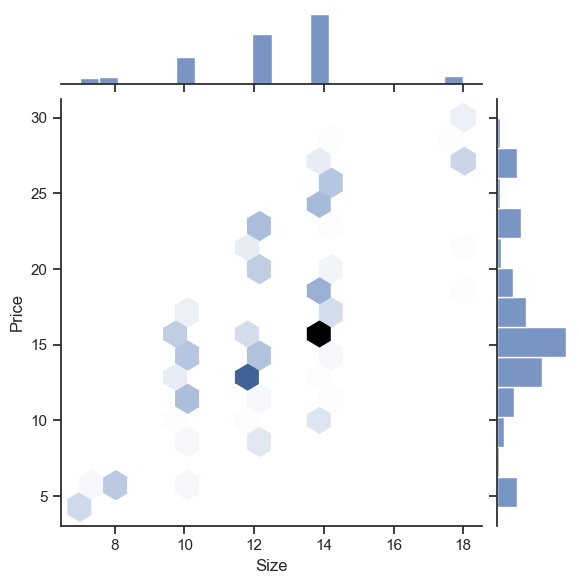

In [231]:
sns.jointplot(x='Size', y='Price', data=df, kind="hex")

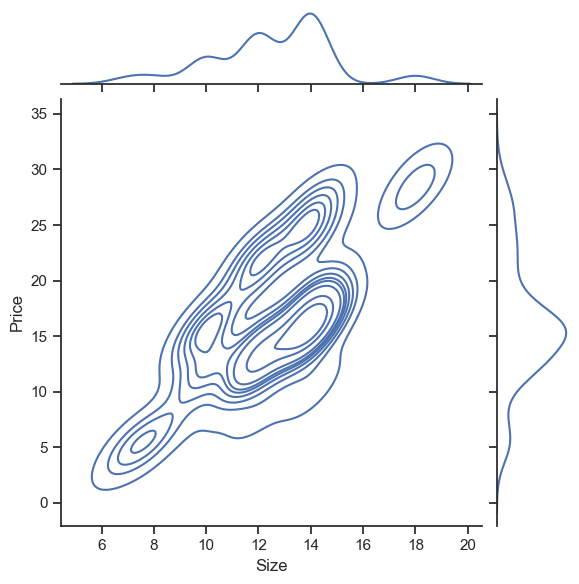

In [243]:
sns.jointplot(x='Size', y='Price', data=df, kind="kde")

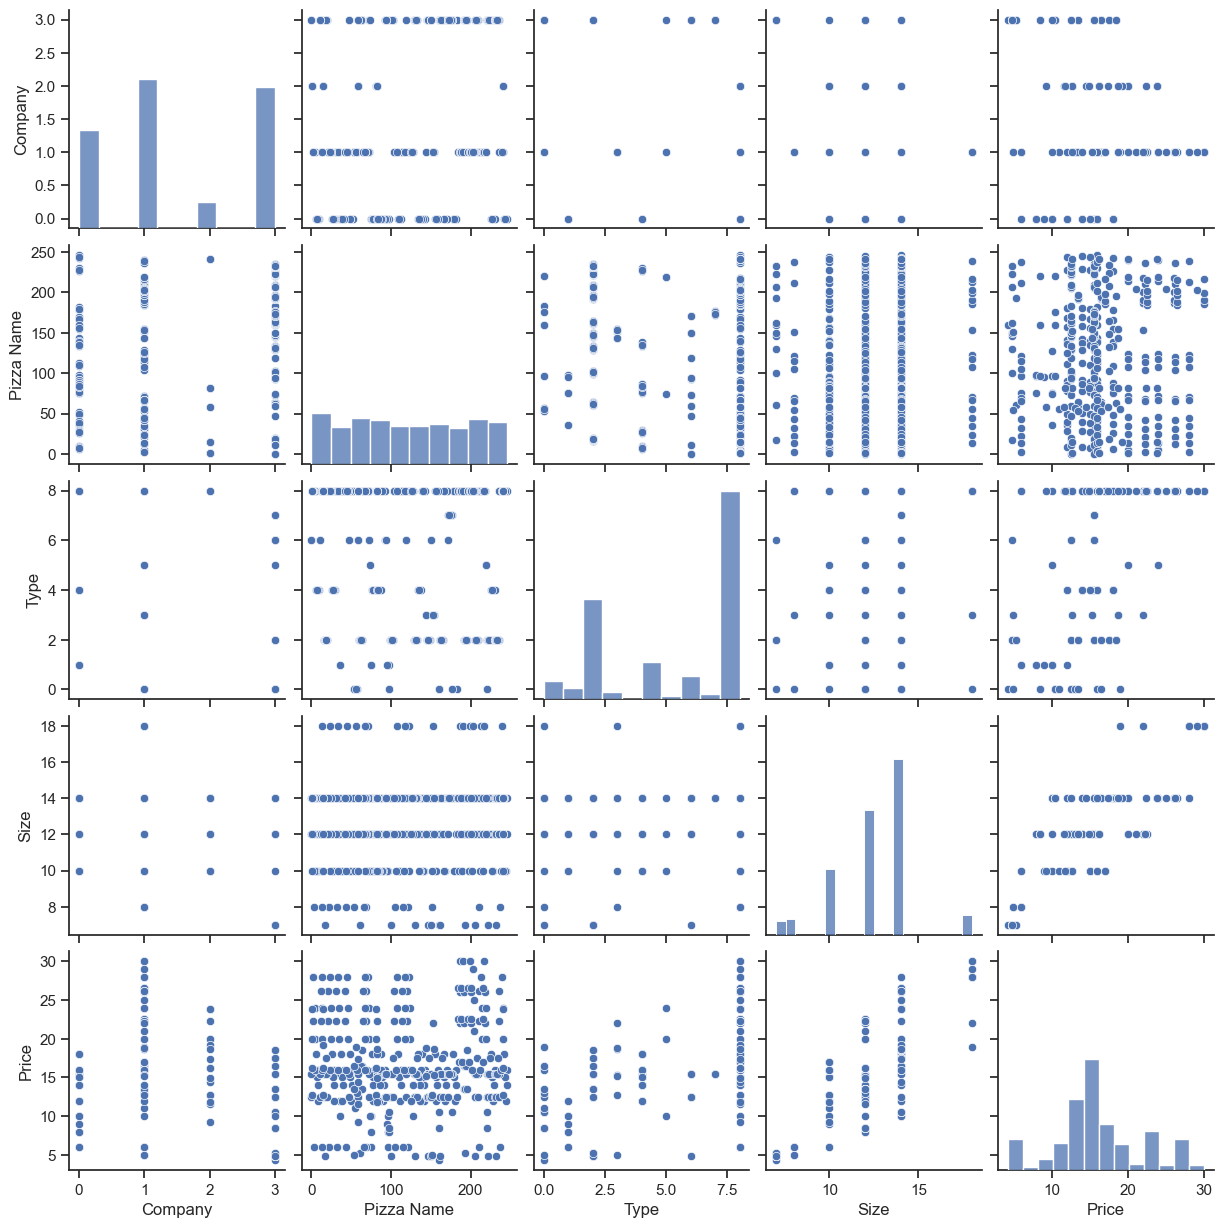

In [232]:
#Парные диаграммы
sns.pairplot(df)

### Ящик с усами

<Axes: xlabel='Price'>

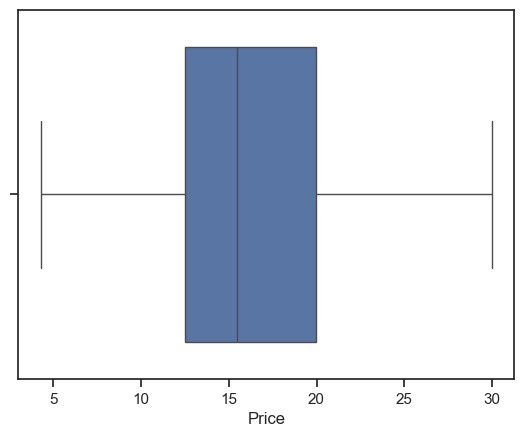

In [233]:
sns.boxplot(x=df["Price"])

<Axes: xlabel='Price', ylabel='Company'>

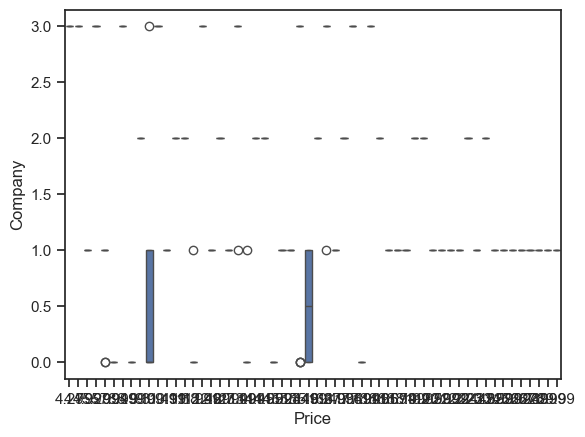

In [234]:
sns.boxplot(x="Price", y="Company", data=df)

### Violin plot

<Axes: xlabel='Size'>

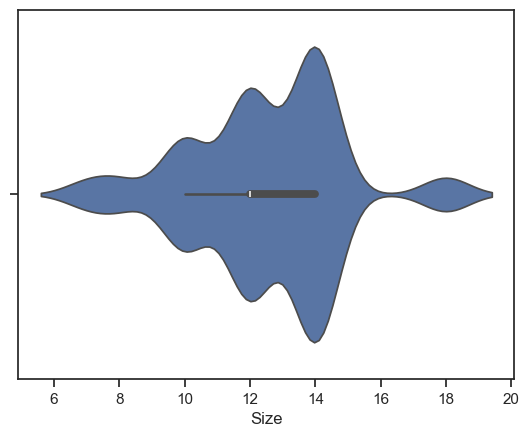

In [235]:
sns.violinplot(x=df["Size"])

<Axes: xlabel='Size', ylabel='Price'>

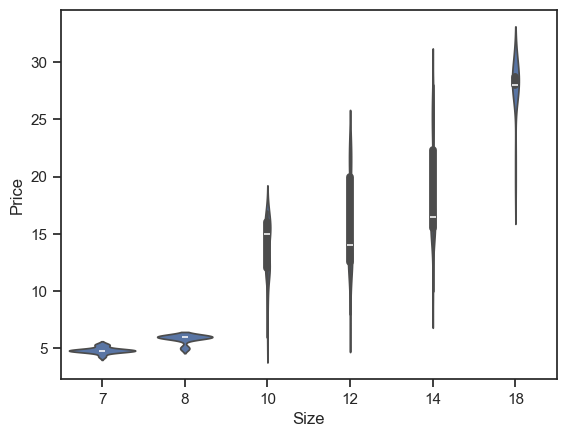

In [236]:
sns.violinplot(x="Size", y="Price", data=df)

## 4) Информация о корреляции признаков

In [237]:
#Корреляция по критерию Пирсона
df.corr(method="pearson")

,Company,Pizza Name,Type,Size,Price
Company,1.000000,0.145478,-0.501124,0.070361,-0.213092
Pizza Name,0.145478,1.000000,-0.093638,0.050157,0.035486
Type,-0.501124,-0.093638,1.000000,0.016750,0.477250
Size,0.070361,0.050157,0.016750,1.000000,0.711833
Price,-0.213092,0.035486,0.477250,0.711833,1.000000


In [238]:
#Корреляция Кендалла
df.corr(method="kendall")

,Company,Pizza Name,Type,Size,Price
Company,1.000000,0.105105,-0.407225,0.120948,-0.122327
Pizza Name,0.105105,1.000000,-0.065119,0.044671,0.015572
Type,-0.407225,-0.065119,1.000000,-0.042603,0.389201
Size,0.120948,0.044671,-0.042603,1.000000,0.525855
Price,-0.122327,0.015572,0.389201,0.525855,1.000000


In [239]:
#Корреляция Спирмена
df.corr(method="spearman")

,Company,Pizza Name,Type,Size,Price
Company,1.000000,0.141056,-0.486565,0.145161,-0.153798
Pizza Name,0.141056,1.000000,-0.089076,0.058707,0.021691
Type,-0.486565,-0.089076,1.000000,-0.049476,0.489593
Size,0.145161,0.058707,-0.049476,1.000000,0.633828
Price,-0.153798,0.021691,0.489593,0.633828,1.000000


<Axes: >

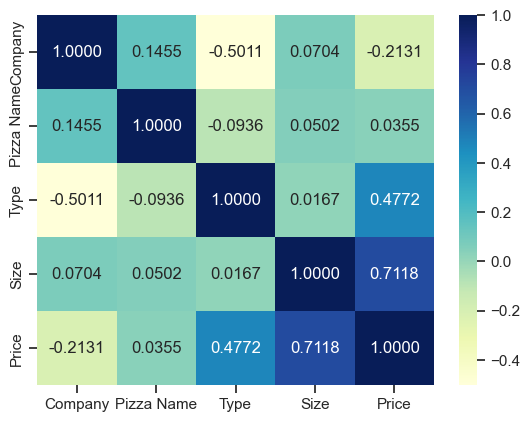

In [240]:
#Визуализация корреляционной матрицы
sns.heatmap(df.corr(), annot=True, fmt=".4f", cmap="YlGnBu")

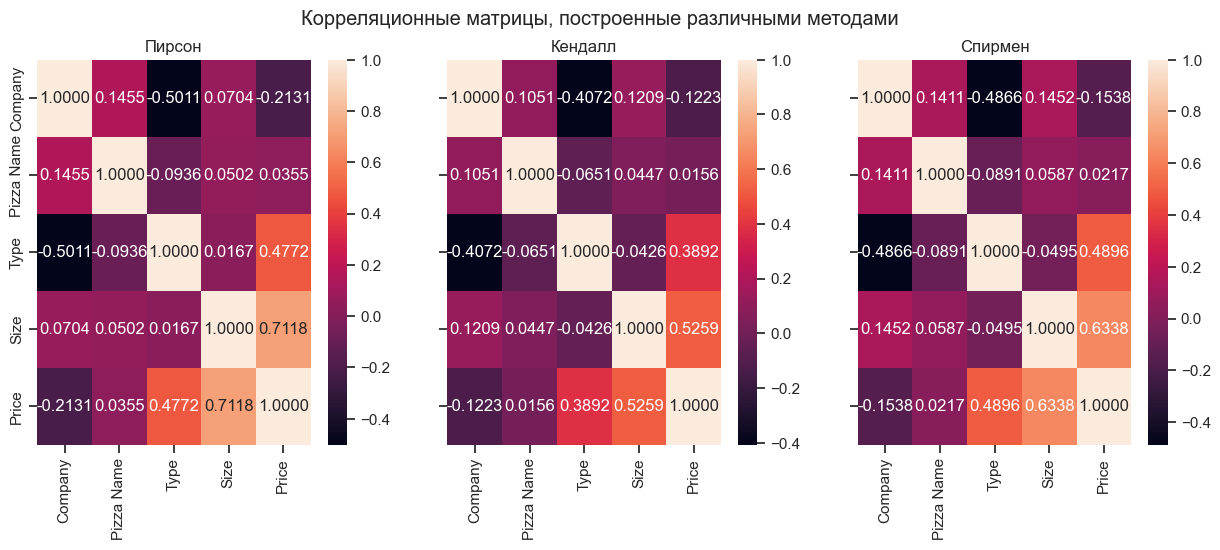

In [241]:
fig, ax = plt.subplots(1, 3, sharex="col", sharey="row", figsize=(15,5))
sns.heatmap(df.corr(method="pearson"), ax=ax[0], annot=True, fmt=".4f")
sns.heatmap(df.corr(method="kendall"), ax=ax[1], annot=True, fmt=".4f")
sns.heatmap(df.corr(method="spearman"), ax=ax[2], annot=True, fmt=".4f")
fig.suptitle("Корреляционные матрицы, построенные различными методами")
ax[0].title.set_text("Пирсон")
ax[1].title.set_text("Кендалл")
ax[2].title.set_text("Спирмен")